# Portfolio optimization with Sharpe Ratio and Monte Carlo simulation 

Portfolio optimization is a key part of investment management that aims to maximize returns while minimizing risk. By carefully choosing where to put their money, investors can create a well-balanced portfolio that fits their risk level and financial goals. This helps in allocating capital more efficiently, reducing unnecessary risks, and improving long-term performance.<br>

The challenge, however, is figuring out how to allocate assets effectively. That’s where portfolio optimization techniques come in. There are many methods for optimizing, but I’ll be using Monte Carlo simulation. In this approach, I'll randomly assign allocations to the portfolio and run the simulation 25,000 times to find which allocation gives the best cumulative return.

<i>PS: I will use the Sharpe Ratio to measure the return relative to volatility and determine whether the investment is worth it.<i>

In [254]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf

In [256]:
start = '2023-01-01'
end = '2024-01-01'

ibm = yf.download("IBM", start=start, end=end)
microsoft = yf.download("MSFT", start=start, end=end)
google= yf.download("GOOGL", start=start, end=end)
apple = yf.download("AAPL", start=start, end=end)
amazon = yf.download("AMZN", start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [258]:
ibm.head()

Price,Close,High,Low,Open,Volume
Ticker,IBM,IBM,IBM,IBM,IBM
Date,,,,,
2023-01-03,130.147705,130.469503,129.163890,129.733957,3338600
2023-01-04,131.113129,132.050954,129.982199,130.625823,3869200
2023-01-05,129.743164,131.021195,128.731767,130.966030,2866600
2023-01-06,132.124512,132.630210,130.175289,130.910849,3574000
2023-01-09,131.986603,133.751939,131.848677,132.473909,3987700


In [260]:
for stock in (ibm,microsoft,google,apple,amazon):
    stock['Normalized Return'] = stock['Close']/stock.iloc[0]['Close']

In [262]:
weights = [.2,.2,.2,.2,.2]

for stock,weight in zip((ibm,microsoft,google,apple,amazon),weights):
    stock['Position Value'] = (stock['Normalized Return'] * weight) * 1000

In [264]:
ibm.head()

Price,Close,High,Low,Open,Volume,Normalized Return,Position Value
Ticker,IBM,IBM,IBM,IBM,IBM,,
Date,,,,,,,
2023-01-03,130.147705,130.469503,129.163890,129.733957,3338600,1.000000,200.000000
2023-01-04,131.113129,132.050954,129.982199,130.625823,3869200,1.007418,201.483581
2023-01-05,129.743164,131.021195,128.731767,130.966030,2866600,0.996892,199.378336
2023-01-06,132.124512,132.630210,130.175289,130.910849,3574000,1.015189,203.037789
2023-01-09,131.986603,133.751939,131.848677,132.473909,3987700,1.014129,202.825863


<h3> Position values after one year

In [267]:
all_pos_val = [
    ibm['Position Value'], microsoft['Position Value'], google['Position Value'], apple['Position Value'], amazon['Position Value']
]

In [269]:
port_val = pd.concat(all_pos_val, axis=1)

port_val.columns = ['IBM','Microsoft','Google','Apple','Amazon']

port_val.head()

,IBM,Microsoft,Google,Apple,Amazon
Date,,,,,
2023-01-03,200.000000,200.000000,200.000000,200.000000,200.000000
2023-01-04,201.483581,191.251355,197.666060,202.062853,198.415287
2023-01-05,199.378336,185.583085,193.447035,199.920050,193.707768
2023-01-06,203.037789,187.770259,196.005377,207.275921,200.605924
2023-01-09,202.825863,189.598452,197.531409,208.123431,203.588909


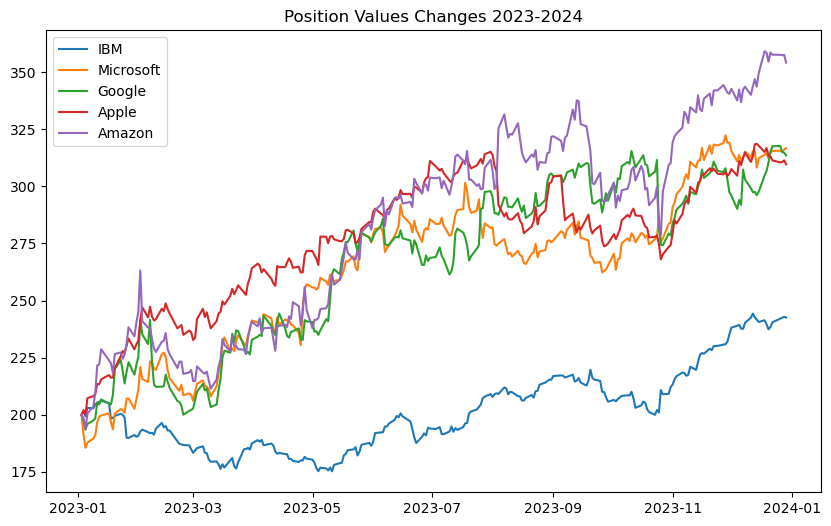

In [273]:
plt.figure(figsize=(10,6))
plt.plot(port_val)
plt.title('Position Values Changes 2023-2024')
plt.legend(['IBM','Microsoft','Google','Apple','Amazon']);

<i>The position gained a lot throughout the year. Among all the stocks, we can see that IBM is not performing well interms of cumulative return.<i>

<h3>Checking the total portfolio value gained<h3>

In [279]:
port_val['Total'] = port_val.sum(axis=1)

In [281]:
port_val.tail()

,IBM,Microsoft,Google,Apple,Amazon,Total
Date,,,,,,
2023-12-22,240.470070,315.469842,317.526924,311.317109,357.539032,1542.322978
2023-12-26,242.057012,315.537219,317.594249,310.432688,357.515740,1543.136908
2023-12-27,242.427779,315.040339,315.013431,310.593451,357.352591,1540.427591
2023-12-28,242.857870,316.059423,314.699245,311.284907,357.445829,1542.347274
2023-12-29,242.561247,316.699470,313.487417,309.596470,354.089963,1536.434567


In [285]:
c_r = ((port_val['Total'][-1] - port_val['Total'][0]) / port_val['Total'][0]) * 100

print("Cumulative return :", c_r)

Cumulative return : 53.643456701639394


/var/folders/0q/ss18s97x26754rd0xvyqqktr0000gn/T/ipykernel_22164/334618829.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c_r = ((port_val['Total'][-1] - port_val['Total'][0]) / port_val['Total'][0]) * 100


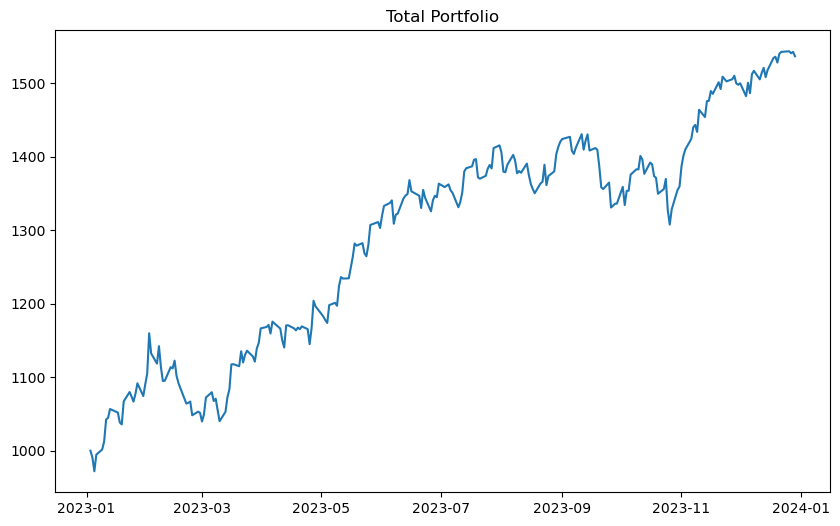

In [287]:
plt.figure(figsize=(10,6))
plt.plot(port_val['Total'])
plt.title('Total Portfolio');

<i>Since portfolio value after one year is $1536 and investment is 1000, cumulative return is 54%.<i>

# Sharpe Ratio 

The Sharpe Ratio is a key metric in portfolio optimization that measures risk-adjusted returns.It equation is 

Sharpe Ratio = (Rp - Rf) / σp

Where:
- Rp = Portfolio return
- Rf = Risk-free rate
- σp = Portfolio standard deviation (risk)

A higher Sharpe Ratio indicates better risk-adjusted performance, meaning the portfolio is generating higher returns per unit of risk. Investors use it to compare different portfolios and select the one that provides the best return relative to its volatility.

<b>Note: The Sharpe ratio is a yearly metric, but I'm working with daily data. To annualize the return, I needed to multiply by  
sqrt{255}<b>

<h3>Checking out the Sharpe Ratio of evenly allocation<h3>

In [309]:
#adding daily return col to calculate sharpe ratio 

#getting daily return on total position : calculation > today's position / yst's position
port_val['Daily Return'] = port_val['Total'].pct_change(1)

port_val.head()

,IBM,Microsoft,Google,Apple,Amazon,Total,Daily Return
Date,,,,,,,
2023-01-03,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,NaN
2023-01-04,201.483581,191.251355,197.666060,202.062853,198.415287,990.879137,-0.009121
2023-01-05,199.378336,185.583085,193.447035,199.920050,193.707768,972.036272,-0.019016
2023-01-06,203.037789,187.770259,196.005377,207.275921,200.605924,994.695270,0.023311
2023-01-09,202.825863,189.598452,197.531409,208.123431,203.588909,1001.668063,0.007010


In [311]:
#Sharpe Ratio
# port_val = port_val.dropna()

sharpe_ratio = port_val['Daily Return'].mean() / port_val['Daily Return'].std() 
an_sr = sharpe_ratio * (255**0.5)

print("Sharpe Ratio = ",an_sr)

Sharpe Ratio =  2.393798125401393


<b><i>A Sharpe Ratio of 2.4 indicates an excellent investment portfolio. However, in reality, with a diverse portfolio containing assets with varying risk-to-return ratios, achieving this level is quite challenging. Most top investment funds typically have a Sharpe Ratio around 2.</i></b>

Sharpe ratio values:
<ul>
  <li>< 1: Not good, there may be more efficient investments with better risk-reward profiles</li>
  <li>1 >=: Decent investment</li>
  <li>2 >=: Pretty good</li>
  <li>5 >=: Excellent investment</li>
</ul>


<h1>Monte-Carlo Simulation</h1>

<p>Monte Carlo Simulation is a technique where we run lots of random simulations to see how different factors affect the outcome. It's helpful for portfolio optimization because it lets us try out many allocation combinations to find the best one.<p>

<p>By checking the Sharpe ratio for each combination, we can find the allocation that offers the best return for the risk we're taking. It's a great way to figure out the most efficient portfolio, especially when there’s a lot of uncertainty.<p>

In [315]:
#first need to prepare the df in order to calculate sharpe ratio easily
#will use log return which is commonly used.because they are time-consistent, better normalize extreme price changes

stocks = pd.concat([ibm['Close'],microsoft['Close'],google['Close'],apple['Close'],amazon['Close']], axis=1)

log_rt = np.log(stocks/stocks.shift(1))
log_rt = log_rt.dropna()

log_rt.head()

Ticker,IBM,MSFT,GOOGL,AAPL,AMZN
Date,,,,,
2023-01-04,0.007391,-0.044729,-0.011738,0.010261,-0.007955
2023-01-05,-0.010504,-0.030086,-0.021575,-0.010661,-0.024012
2023-01-06,0.018188,0.011717,0.013138,0.036133,0.034992
2023-01-09,-0.001044,0.009689,0.007756,0.004080,0.014760
2023-01-10,0.008670,0.007588,0.004534,0.004447,0.028327


In [317]:
# # of simulations
num_sim = 25000

#empty array to add the answers 
#to store all the allocations 
all_allo = np.zeros((num_sim,len(stocks.columns)))
#to store expected returns
ret_arr = np.zeros(num_sim)
#to store expected volatitliy
vol_arr = np.zeros(num_sim)
#to store sharpe ratios 
sharpe_arr = np.zeros(num_sim)

In [319]:
#looping for num of simulations and finding the expected return, volatility and sharpe ratio for each simulation

for i in range(num_sim):
    #creating random allocations for each round
    rnd_allo = np.array(np.random.random(5))
    #making sure sum of random allocation is equal to 1. 
    rnd_allo = rnd_allo/np.sum(rnd_allo) 

    #adding each allocation to the empty array 
    all_allo[i,:] = rnd_allo

    #expected return 
    ret_arr[i] = np.sum((log_rt.mean() * rnd_allo) * 252)

    #expected volatility 
    vol_arr[i] = np.sqrt(np.dot(rnd_allo.T, np.dot(log_rt.cov()*252, weights)))

    #Sharpe ratio
    sharpe_arr[i] = ret_arr[i]/vol_arr[i] 

In [321]:
#best sharpe ratio
print('Best Sharpe Ratio =',sharpe_arr.max())

Best Sharpe Ratio = 2.614805824143879


In [335]:
#allo for best sharpe ratio 
print("Optimal allocations for best sharp ratio is ",all_allo[5512,:] * 100)

Optimal allocations for best sharp ratio is  [ 0.24672624  4.81799541  2.50419332 70.82125545 21.60982957]


In [325]:
sharpe_arr.argmax()

5512

In [337]:
max_vol_arr = vol_arr[5512]
max_sr_ret = ret_arr[5512]

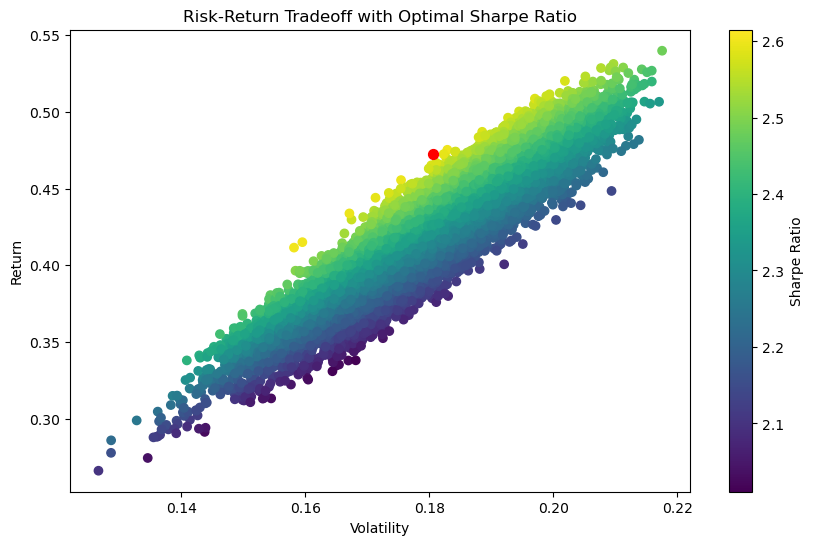

In [339]:
#printing out the best sharpe ratio 
plt.figure(figsize=(10,6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');
plt.title('Risk-Return Tradeoff with Optimal Sharpe Ratio')
plt.scatter(max_vol_arr, max_sr_ret, c='red', s=50);

In [331]:
#checking cumulative return with optimal allocation 
for stock,weight in zip((ibm,microsoft,google,apple,amazon),all_allo[22582,:]):
    stock['New Position Value'] = (stock['Normalized Return'] * weight) * 1000

all_pos_val_ = [
    ibm['New Position Value'], microsoft['New Position Value'], google['New Position Value'], apple['New Position Value'], amazon['New Position Value']
]

new_port_val = pd.concat(all_pos_val_, axis=1)

new_port_val.columns = ['Meta','Microsoft','Google','Apple','Amazon']
new_port_val = new_port_val.dropna()

new_port_val['Total'] = new_port_val.sum(axis=1)

cumulative_return = ((new_port_val['Total'][-1] - new_port_val['Total'][0]) / new_port_val['Total'][0]) * 100
print("Cumulative return with optimal allocation : ", cumulative_return)
print("Toal position value :", new_port_val['Total'][-1])

Cumulative return with optimal allocation :  62.056010421927375
Toal position value : 1620.5601042192736


/var/folders/0q/ss18s97x26754rd0xvyqqktr0000gn/T/ipykernel_22164/111329723.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = ((new_port_val['Total'][-1] - new_port_val['Total'][0]) / new_port_val['Total'][0]) * 100
/var/folders/0q/ss18s97x26754rd0xvyqqktr0000gn/T/ipykernel_22164/111329723.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Toal position value :", new_port_val['Total'][-1])


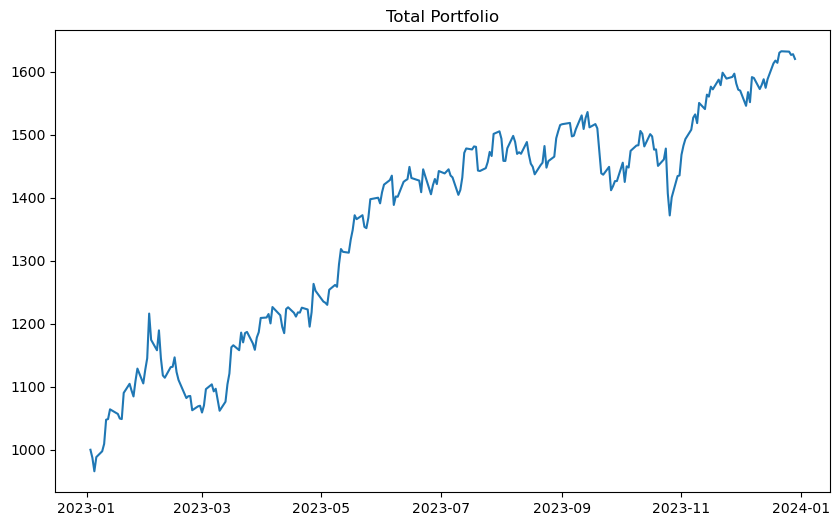

In [333]:
plt.figure(figsize=(10,6))
plt.plot(new_port_val['Total'])
plt.title('Total Portfolio');

In this simulation, we can see that a Sharpe ratio of **2.6** is the best we can get after running **25,000** simulations with random allocations. The portfolio breakdown looks like this:  

- **0.3%** in IBM  
- **5%** in Microsoft  
- **2.5%** in Google  
- **71%** in Apple  
- **21%** in Amazon  

Note that the **Sharpe ratio** is not focused on maximizing return on investment. If that were the case, the entire portfolio would be allocated to Amazon. Instead, the Sharpe ratio measures **return in terms of risk**, finding the sweet spot between the best return and the least volatility.  

There are additional concepts behind this, such as investing in **liquid assets**, but we won’t dive deep into those here.  

**The scatter plot shows that as risk (volatility) increases, we can achieve a higher return.**  

*It’s a fun simulation, but other models offer better performance when optimizing a portfolio. Still, this provides a decent overview of which allocations work best and whether it’s worth investing.*  
